逻辑回归(Logistic Regression)

# 1.导入相应的包

In [1]:
import numpy as np
import pandas as pd

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

#visualizations
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

2.读取数据文件CSV

In [2]:
df = pd.read_csv('watermelon_dataset3.csv', index_col=0)
df


,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


3.EDA数据工程

将数据分为字符串列、数字列和标签列，在对其进行操作，对于标签列进行转化，将是和否转化为0和1;
数字列用于One-Hot编码，在对数值类型进行标准归一化。

In [3]:
# 字符串列
str_columns = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']

# 数字列
num_columns = ['密度', '含糖率']

#标签列
label_columns = ['好瓜']

In [4]:
#将标签列进行转化，是否转化为0和1
for i in tqdm(label_columns):
    lbl = LabelEncoder()
    df[i] = lbl.fit_transform(df[i].astype(str))

# 将其他列进行One-hot编码
df = pd.get_dummies(df)

df

100%|██████████| 1/1 [00:00<00:00, 1001.51it/s]


,密度,含糖率,好瓜,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘
编号,,,,,,,,,,,,,,,,,,,,
1,0.697,0.460,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,0.774,0.376,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
3,0.634,0.264,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
4,0.608,0.318,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
5,0.556,0.215,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
6,0.403,0.237,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
7,0.481,0.149,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
8,0.437,0.211,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
9,0.666,0.091,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0


In [5]:
# 对数值列进行标准归一化
df[num_columns] = StandardScaler().fit_transform(df[num_columns])

df

,密度,含糖率,好瓜,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘
编号,,,,,,,,,,,,,,,,,,,,
1,1.015011,2.125346,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,1.490548,1.403072,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
3,0.625936,0.440041,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
4,0.465365,0.904359,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
5,0.144223,0.018714,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
6,-0.800675,0.207881,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
7,-0.318962,-0.548786,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
8,-0.590697,-0.015680,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
9,0.823562,-1.047499,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0


In [6]:

all_columns = [i for i in df.columns if i not in ['编号','好瓜']]

# 获取X 特征矩阵向量
X = df[all_columns].values

# 获取y 标签向量
y = df[label_columns].values

4. 进行网格搜索找最优的参数
- 需要调优的参数
- 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
- tuned_parameters = {'penalty':['l1','l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
                   }
- L1和L2正则化

C:\Users\82115\.conda\envs\python36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82115\.conda\envs\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82115\.conda\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\82115\.conda\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\82115\.conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarni

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
-0.6597904694167614
{'C': 0.1, 'penalty': 'l2'}


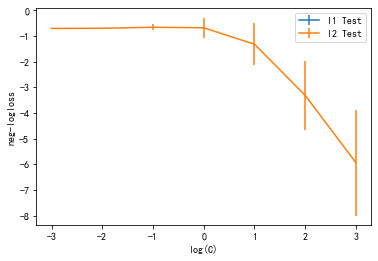

In [7]:
#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
#L1和L2正则化
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
#LR模型声明
lr_penalty= LogisticRegression()
#网格搜索声明
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
# 进行训练
grid.fit(X, y)

# 网格搜索的关键字
print(grid.cv_results_.keys())

# 最优得分
print(grid.best_score_)
# 最优参数
print(grid.best_params_)


# 绘制plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]



# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')

plt.legend()
plt.xlabel( 'log(C)' )
plt.ylabel( 'neg-logloss' )
plt.savefig('LogisticGridSearchCV_C.svg' )

plt.show()
